In [136]:
#!pip install praw
import praw
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [100]:
reddit = praw.Reddit(
    client_id='rn3pJniAEOiNzoQoc0ptpA',
    client_secret='7yY-gQrwtJqHeeMp_dETpoYwMZTFIA',
    user_agent='sycamorecg0827',
    username='sycamorecg',
#     password='Tennis12!
)

In [101]:
# Below is JUST an example of how you can use PRAW

# Choose your subreddit
interesting = reddit.subreddit('interestingasfuck')

# Adjust the limit as needed -- Note that this will grab the 25 most recent posts
posts = interesting.top(limit=10)

In [102]:
interesting = reddit.subreddit('interestingasfuck')
posts = interesting.top(limit=10)
›
data = []
def data_frame(posts):
    for post in posts:
        data.append([post.created_utc, post.title, post.selftext, post.subreddit])
    
    df = pd.DataFrame(data, columns = ['created_utc', 'title', 'self_text', 'subreddit'])
    df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')
    return df

In [103]:
top_10 = data_frame(posts)

In [174]:
top_10
    

,created_utc,title,self_text,subreddit
0,2022-03-01 16:51:15,In 1996 Ukraine handed over nuclear weapons to...,,interestingasfuck
1,2022-02-28 16:07:32,Ukrainian ambassador to the UN pretty much tel...,,interestingasfuck
2,2021-06-30 12:18:46,“The dog on the Left is award winning showdog ...,,interestingasfuck
3,2022-02-06 18:31:40,My turtle follows me and seeks out affection. ...,,interestingasfuck
4,2020-06-03 20:08:04,"In England you sometimes see these ""wavy"" bric...",,interestingasfuck
5,2021-05-02 16:26:00,I created a photorealistic image of George Was...,,interestingasfuck
6,2022-05-31 23:28:50,Vietnam veteran being told how much his Rolex ...,,interestingasfuck
7,2022-01-17 22:15:16,Riding abandoned railroad tracks in Southern C...,,interestingasfuck
8,2020-06-05 15:27:59,The road to the White House just got a fresh p...,,interestingasfuck
9,2022-02-24 15:45:38,People in St Petersburg are allegedly protesti...,,interestingasfuck


In [82]:
interesting_af = pd.concat([interesting_first_100, interesting_af])

In [105]:
interesting_af

,created_utc,title,self_text,subreddit
0,2024-07-09 17:29:29,"This coconut tree in the beautiful Maceió, Bra...",,interestingasfuck
1,2024-07-09 17:24:42,Ancient Roman Sarcophagus Showing On a Side A ...,,interestingasfuck
2,2024-07-09 17:05:57,Falcon 🗿,,interestingasfuck
3,2024-07-09 16:04:39,How germs travel a lot when flushing an open t...,,interestingasfuck
4,2024-07-09 14:59:04,Rain water,,interestingasfuck
...,...,...,...,...
906,2024-06-23 03:46:36,Jindal Steel's film wins Cannes Lion awards fo...,,interestingasfuck
907,2024-06-23 03:33:04,The Rolls-Royce Micro-Reactor will provide rel...,,interestingasfuck
908,2024-06-23 02:38:57,Eternal Flame Falls in New York features a nat...,,interestingasfuck
909,2024-06-23 02:35:52,"a Newari Festival in Nepal ""RATO MACHINDANATH ...",,interestingasfuck


In [22]:
mildly = pd.read_csv('mildy_interesting.csv')

In [176]:
all_of_em = pd.concat([mildly, interesting_af])

In [177]:
all_of_em['subreddit'] = all_of_em['subreddit'].map({'mildlyinteresting': True, 'interestingasfuck': False})

In [178]:
all_of_em['subreddit'] = all_of_em['subreddit']*1

In [179]:
all_of_em.drop(columns=['Unnamed: 0'], inplace=True)

In [182]:
all_of_em['subreddit'].value_counts(normalize=True)

subreddit
0    0.507021
1    0.492979
Name: proportion, dtype: float64

In [215]:
mildly_int = all_of_em[all_of_em['subreddit'] == 1]
int_af = all_of_em[all_of_em['subreddit'] == 0]

In [234]:
mildly_int = mildly_int['title']

In [250]:
cvec_mild = CountVectorizer(ngram_range=(2, 2), stop_words='english' )
cvec_mild.fit(mildly_int)

CountVectorizer(ngram_range=(2, 2), stop_words='english')

In [251]:
trans = cvec_mild.transform(mildly_int)

In [252]:
trans.shape

(983, 3910)

In [253]:
mild_df = pd.DataFrame(
    trans.toarray(), 
    columns=cvec_mild.get_feature_names_out()
)

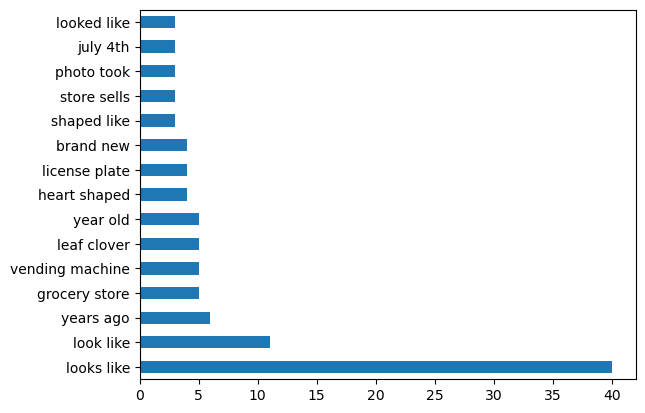

In [267]:
mild_df.sum().sort_values(ascending = False).head(15).plot(kind='barh');
plt.savefig('mild.png')

In [257]:
int_af = int_af['title']

In [258]:
cvec_af = CountVectorizer(ngram_range=(2, 2), stop_words='english' )

In [259]:
cvec_af.fit(int_af)

CountVectorizer(ngram_range=(2, 2), stop_words='english')

In [260]:
trans_af = cvec_af.transform(int_af)

In [261]:
af_df = pd.DataFrame(
    trans_af.toarray(), 
    columns=cvec_af.get_feature_names_out()
)

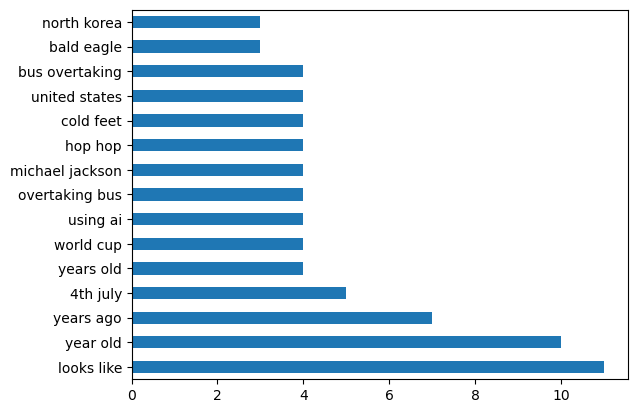

In [265]:
af_df.sum().sort_values(ascending = False).head(15).plot(kind='barh');
plt.savefig('int_af.png')

In [248]:
X = all_of_em['title']
y = all_of_em['subreddit']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [389]:
pipe_tvec = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('rf', RandomForestClassifier(oob_score=True))
])

In [394]:
pipe_params = {
    'tvec__max_features': [2_000, 3_000, 4_000, 5_000],
    'tvec__min_df': [2, 3],
    'tvec__max_df': [.9, .95],
    'tvec__ngram_range': [(1, 1), (1, 2),(2, 2)]
}


gs_cvec = GridSearchCV(
    pipe_tvec_rf,
    param_grid = pipe_params,
    cv = 5,
    n_jobs = 8
)

In [395]:
%%time
# Fit GridSearch to training data.
gs_cvec.fit(X_train, y_train)

CPU times: user 619 ms, sys: 153 ms, total: 772 ms
Wall time: 9.44 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('rf',
                                        RandomForestClassifier(oob_score=True))]),
             n_jobs=8,
             param_grid={'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 1), (1, 2), (2, 2)]})

In [396]:
gs_cvec.best_params_

{'tvec__max_df': 0.9,
 'tvec__max_features': 5000,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 2)}

In [397]:
y_test.value_counts(normalize=True)

subreddit
1    0.50211
0    0.49789
Name: proportion, dtype: float64

In [398]:
gs_cvec.score(X_train, y_train)

0.9964788732394366

In [399]:
gs_cvec.score(X_test, y_test)

0.7974683544303798

In [400]:
y_pred = gs.predict(X_test)

In [401]:
cm = metrics.confusion_matrix(y_test, y_pred)

In [402]:
cm_df = pd.DataFrame(cm, columns=['pred midly interesting', 'pred interestingaf'], index=['actual mildly interesting', 'actual interestingaf'])

In [403]:
cm_df

,pred midly interesting,pred interestingaf
actual mildly interesting,141,95
actual interestingaf,39,199


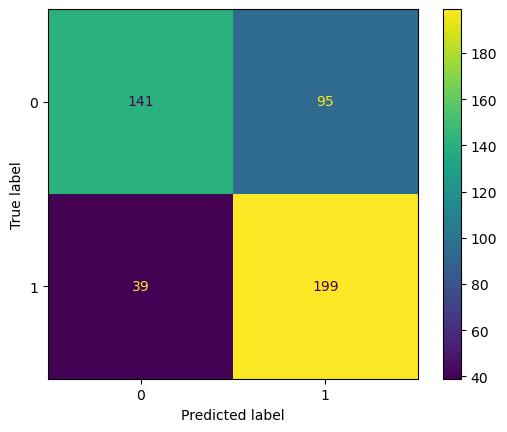

In [404]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot().figure_.savefig('confusion_matrixRF_CV.png')

In [300]:
print(metrics.classification_report(y_test, y_pred, digits = 5))

              precision    recall  f1-score   support

           0    0.78333   0.59746   0.67788       236
           1    0.67687   0.83613   0.74812       238

    accuracy                        0.71730       474
   macro avg    0.73010   0.71680   0.71300       474
weighted avg    0.72988   0.71730   0.71315       474



In [369]:
pipe1 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('et', ExtraTreesClassifier())
])

In [370]:
pipe1.fit(X_train, y_train)

Pipeline(steps=[('tvec', TfidfVectorizer()), ('et', ExtraTreesClassifier())])

In [371]:
pipe1.score(X_train, y_train)

0.9992957746478873

In [372]:
pipe1.score(X_test, y_test)

0.8227848101265823

In [373]:
y_preds = pipe1.predict(X_test)

In [374]:
cm1 = metrics.confusion_matrix(y_test, y_preds)

In [375]:
print(metrics.classification_report(y_test, y_preds, digits = 5))

              precision    recall  f1-score   support

           0    0.79231   0.87288   0.83065       236
           1    0.85981   0.77311   0.81416       238

    accuracy                        0.82278       474
   macro avg    0.82606   0.82300   0.82240       474
weighted avg    0.82620   0.82278   0.82237       474



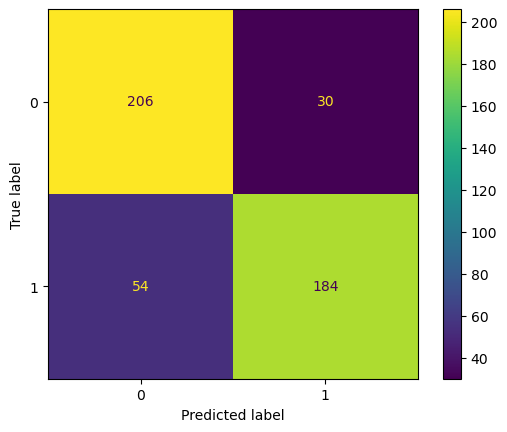

In [376]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot().figure_.savefig('confusion_matrixET_TV.png')

In [378]:
pipe2= Pipeline([
    ('tvec', TfidfVectorizer()),
    ('logreg', LogisticRegression())
])

In [379]:
pipe_params_log = {
    'tvec__max_features': [2_000, 3_000, 4_000, 5_000],
    'tvec__min_df': [2, 3],
    'tvec__max_df': [.9, .95],
    'tvec__ngram_range': [(1, 1), (1, 2),(2,2)]
    
}

# Instantiate GridSearchCV.

gs_log = GridSearchCV(
    pipe2, # what object are we optimizing?
    param_grid = pipe_params_log, # what parameters values are we searching?
    cv = 5, # 5-fold cross-validation.
    n_jobs = 8
)

In [380]:
gs_log.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('logreg', LogisticRegression())]),
             n_jobs=8,
             param_grid={'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 1), (1, 2), (2, 2)]})

In [381]:
gs_log.best_params_

{'tvec__max_df': 0.9,
 'tvec__max_features': 2000,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 2)}

In [382]:
gs_log.score(X_train, y_train)

0.9176056338028169

In [383]:
gs_log.score(X_test, y_test)

0.8333333333333334

In [316]:
y_pred_log = gs_log.predict(X_test)

In [317]:
cm_log = confusion_matrix(y_test, y_pred_log)

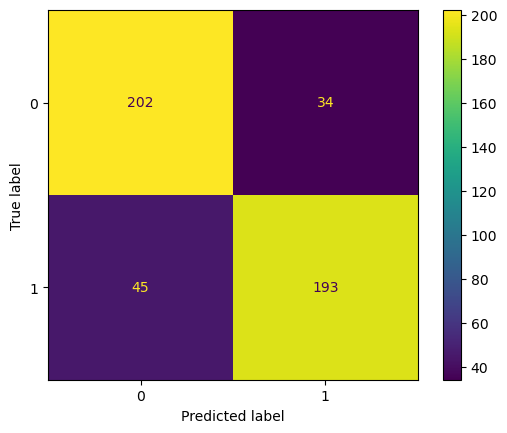

In [320]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_log)
disp.plot().figure_.savefig('confusion_matrix_log_TF.png')

In [319]:
print(metrics.classification_report(y_test, y_pred_log, digits = 5))

              precision    recall  f1-score   support

           0    0.81781   0.85593   0.83644       236
           1    0.85022   0.81092   0.83011       238

    accuracy                        0.83333       474
   macro avg    0.83402   0.83343   0.83327       474
weighted avg    0.83409   0.83333   0.83326       474

